# Liver Cirrhosis Prediction System

Made by Group 4

## Context

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

![Stages of Liver Damage](https://www.researchgate.net/profile/Amir-Ziaee/publication/343712197/figure/fig1/AS:925738282782720@1597724614341/Stages-of-liver-damage.jpg)

Attribute Information
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

## Description of Medical Terminologies

ID (Identifier): A unique code assigned to each individual or patient for the purpose of identification.

N_Days (Number of Days): The number of days between the registration of the patient and the earlier of death, transplantation, or study analysis time in July 1986.

Status: Describes the status of the patient at the end of the observation period. C (Censored), CL (Censored due to liver transplantation), or D (Death).

Drug: The type of drug administered to the patient, either D-penicillamine or placebo.

Age: Age of the patient, typically provided in days in this context.

Sex: Gender of the patient, M for male or F for female.

Ascites: Presence (Y) or absence (N) of abnormal fluid accumulation in the abdominal cavity, often associated with liver disease.

Hepatomegaly: Enlargement of the liver, indicated by Y (Yes) or N (No).

Spiders: Presence (Y) or absence (N) of spider angiomas, which are small, dilated blood vessels near the surface of the skin often associated with liver disease.

Edema: Presence of swelling, indicated by N (no edema and no diuretic therapy), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).

Bilirubin: Serum bilirubin level in milligrams per deciliter (mg/dl), a measure of liver function and the breakdown of red blood cells,Normal range: 0.1 to 1.2 mg/dl

Cholesterol: Serum cholesterol level in milligrams per deciliter (mg/dl), a measure of the amount of cholesterol in the blood.,Normal range: Total cholesterol level less than 200 mg/dl

Albumin: Albumin level in grams per deciliter (gm/dl), a protein produced by the liver that helps maintain blood volume and pressure.,Normal range: 3.5 to 5.5 gm/dl

Copper: Urine copper level in micrograms per day (ug/day), which can be relevant in the diagnosis of Wilson's disease, a genetic disorder affecting copper metabolism.,No specific threshold values provided. The normal range may vary, and abnormal values could indicate a potential issue.

Alk_Phos (Alkaline Phosphatase): Alkaline phosphatase level in Units per liter (U/liter), an enzyme that can be elevated in various liver and bone disorders.,Normal range: 20 to 140 U/liter

SGOT (Serum Glutamic Oxaloacetic Transaminase): SGOT level in Units per milliliter (U/ml), an enzyme released into the blood when the liver or heart is damaged.,Normal range: 8 to 48 U/ml

Triglycerides: Triglyceride level in milligrams per deciliter (mg/dl), a type of fat found in the blood that can be associated with liver function,Normal range: Less than 150 mg/dl

Platelets: Platelet count per cubic milliliter per 1000, a measure of the number of blood platelets, important for blood clotting. ,Normal range: 150,000 to 450,000 platelets per cubic millimeter

Prothrombin: Prothrombin time in seconds (s), a measure of the time it takes for blood to clot, often used to assess liver function, Normal range: 11 to 13 seconds

Stage: Histologic stage of disease, typically graded from 1 to 4, indicating the severity or extent of the disease based on histological examination of tissues.

# ``Preprocessing Part``

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [2]:
# Load the dataset
dataset_path = ''
df = pd.read_csv('../Dataset/cirrhosis.csv')

## 2. Exploratory Data Analysis (EDA)

In [3]:
# Check dataset
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
# Check Dtypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
# Check shape of data
df.shape

(418, 20)

In [6]:
# Check statistical information
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


### 2.1 Univariate Analysis

Single variable exploratory data analysis

### Countplot

Selling price mostly show in area of near 1 million.

### Distribution plot

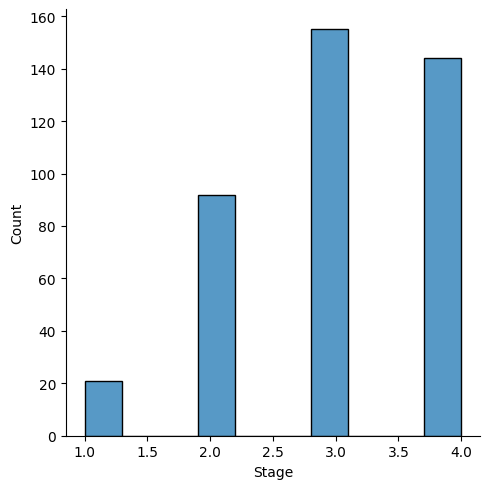

In [7]:
# Let's see distribution of Stage
sns.displot(data=df, x='Stage')

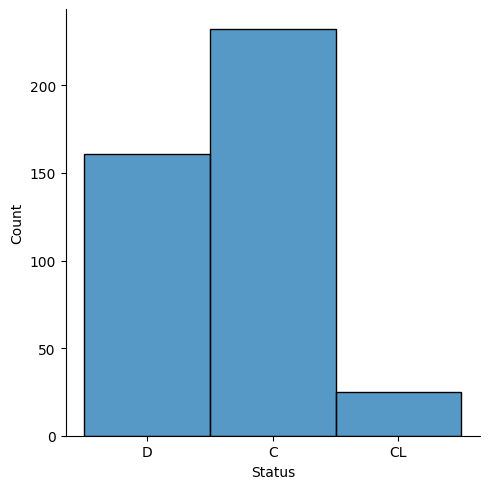

In [8]:
# Let's see distribution of Status
sns.displot(data=df, x='Status')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

### Boxplot

### Feature: ID,
- Drop because don't use it

In [9]:
df.drop(columns=['ID'], inplace=True)

### Feature: Drug,
- Drop for simply because don't understand well about it

In [10]:
df.drop(columns=['Drug'], inplace=True)

In [11]:
# check overview of data now
df.head()

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [12]:
df.shape

(418, 18)

### Map target "Status" to be number

In [13]:
# lass Labels
# Status: status of the patient 
# 0 = D (death), 
# 1 = C (censored), 
# 2 = CL (censored due to liver transplantation)

mapping_dict = {
    'D': 0,
    'C': 1,
    'CL': 2
}
df['Status'] = df['Status'].map(mapping_dict)

In [14]:
df.head()

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,1,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,0,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,0,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,2,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [15]:
df['Status'].unique()

array([0, 1, 2])

In [16]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [17]:
df['Ascites'].unique()

array(['Y', 'N', nan], dtype=object)

In [18]:
df['Hepatomegaly'].unique()

array(['Y', 'N', nan], dtype=object)

In [19]:
df['Spiders'].unique()

array(['Y', 'N', nan], dtype=object)

In [20]:
df['Edema'].unique()

array(['Y', 'N', 'S'], dtype=object)

In [21]:
df.dropna(subset=['Ascites', 'Hepatomegaly', 'Spiders'], inplace=True)

In [22]:
df.shape

(312, 18)

### Label encoding

change text to unique number

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Ascites'] = le.fit_transform(df['Ascites'])
df['Hepatomegaly'] = le.fit_transform(df['Hepatomegaly'])
df['Spiders'] = le.fit_transform(df['Spiders'])
df['Edema'] = le.fit_transform(df['Edema'])

In [24]:
df

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,2,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,1,22347,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,1,21294,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,1,22767,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,1,13879,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


### Correlation Matrix

Use correlation matrix to find strong factors predicting the selling price, and also for checking whether certain features are too correlated.

<Axes: >

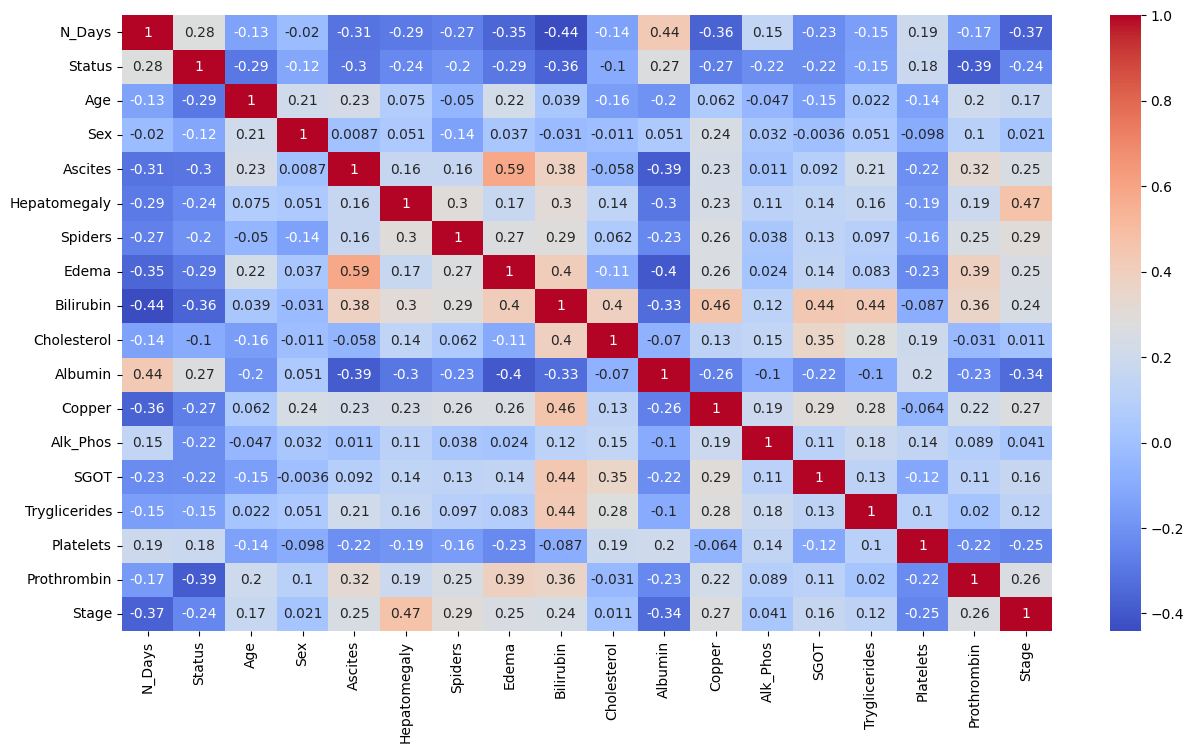

In [25]:
# Check out heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Predictive Power Score

Check the predictive power of some feature. Unlike correlation, `pps` actually obtained from actual prediction.

<Axes: xlabel='x', ylabel='y'>

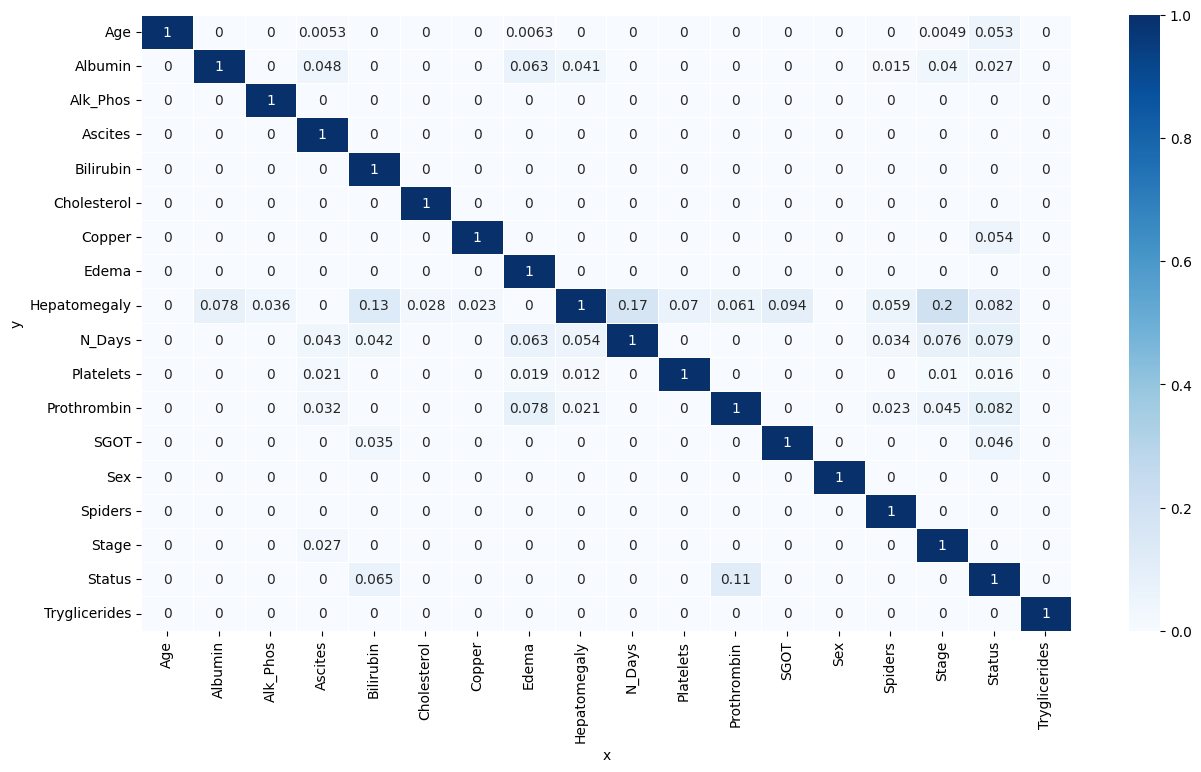

In [26]:
import ppscore as pps

# this needs some minor preprocessing because seaborn.heatmp unfortuately does not accept tidy data
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths=0.5, annot=True)

In [27]:
df

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,2,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,1,22347,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,1,21294,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,1,22767,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,1,13879,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


## 3. Feature Engineering

In [28]:
# skip

## 4. Feature Selection

In [29]:
# x is strong features
X = df[['Bilirubin', 'N_Days','Prothrombin']]

# y is simply the selling_price col
y = df['Status']

In [30]:
X

,Bilirubin,N_Days,Prothrombin
0,14.5,400,12.2
1,1.1,4500,10.6
2,1.4,1012,12.0
3,1.8,1925,10.3
4,3.4,1504,10.9
...,...,...,...
307,0.4,1153,10.4
308,0.4,994,10.8
309,1.7,939,10.2
310,2.0,839,10.5


In [31]:
y

0      0
1      1
2      0
3      0
4      2
      ..
307    1
308    1
309    1
310    1
311    1
Name: Status, Length: 312, dtype: int64

### Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Preprocessing

### Null values

In [33]:
# check for null and na values
print("X_train isna   : ", X_train[['Bilirubin', 'N_Days', 'Prothrombin']].isna().sum(), '\n')
print("X_train isnull : ", X_train[['Bilirubin', 'N_Days', 'Prothrombin']].isnull().sum(), '\n')
print("X_test isna    : ", X_test[['Bilirubin', 'N_Days', 'Prothrombin']].isna().sum(), '\n')
print("X_test isnull  : ", X_test[['Bilirubin', 'N_Days', 'Prothrombin']].isnull().sum(), '\n')
print("y_train isna   : ", y_train.isna().sum(), '\n')
print("y_train isnull : ", y_train.isnull().sum(), '\n')
print("y_train isna   : ", y_test.isna().sum(), '\n')
print("y_train isnull : ", y_test.isnull().sum(), '\n')

X_train isna   :  Bilirubin      0
N_Days         0
Prothrombin    0
dtype: int64 

X_train isnull :  Bilirubin      0
N_Days         0
Prothrombin    0
dtype: int64 

X_test isna    :  Bilirubin      0
N_Days         0
Prothrombin    0
dtype: int64 

X_test isnull  :  Bilirubin      0
N_Days         0
Prothrombin    0
dtype: int64 

y_train isna   :  0 

y_train isnull :  0 

y_train isna   :  0 

y_train isnull :  0 



### Empty values

In [34]:
print("X_train : ", (X_train == '').sum(), '\n')
print("X_test  : ", (X_test  == '').sum(), '\n')
print("y_train : ", (y_train == '').sum(), '\n')
print("y_test  : ", (y_test  == '').sum(), '\n')

X_train :  Bilirubin      0
N_Days         0
Prothrombin    0
dtype: int64 

X_test  :  Bilirubin      0
N_Days         0
Prothrombin    0
dtype: int64 

y_train :  0 

y_test  :  0 



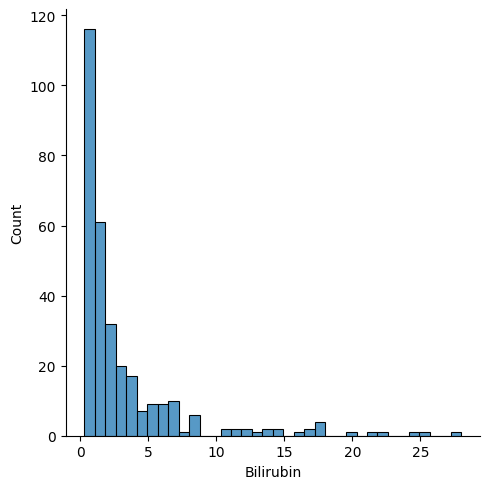

In [35]:
sns.displot(data=df, x='Bilirubin')

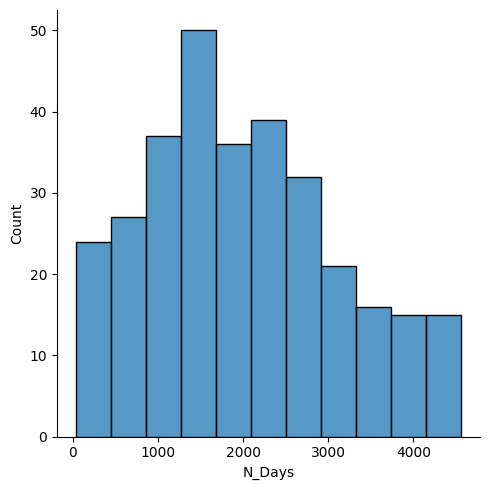

In [36]:
sns.displot(data=df, x='N_Days')

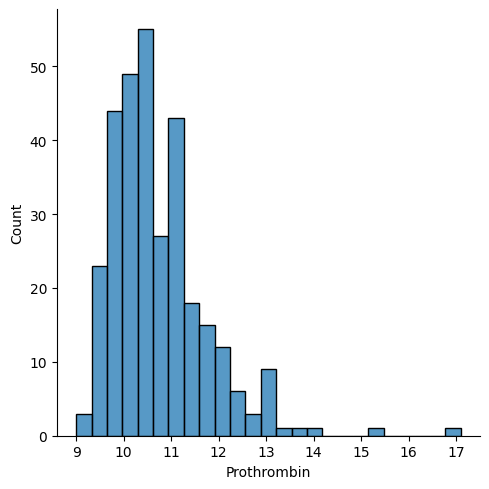

In [37]:
sns.displot(data=df, x='Prothrombin')

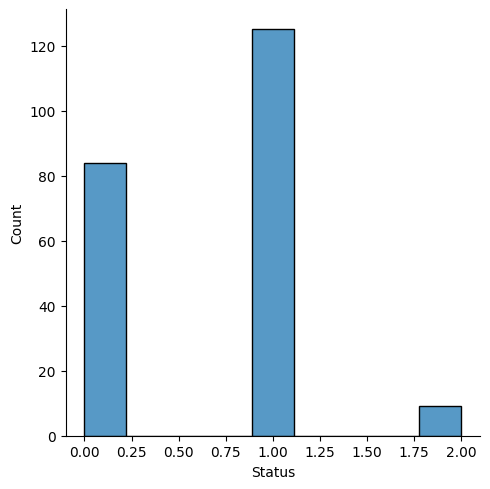

In [38]:
sns.displot(y_train)

### Check Outliers

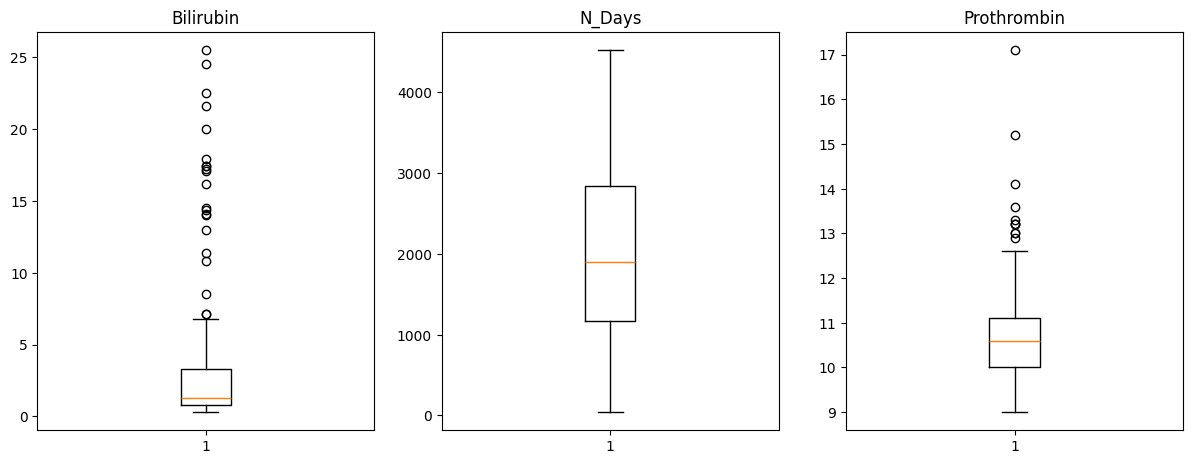

In [39]:
# Create a dictionary of columns.
col_dict = {'Bilirubin': 1, 'N_Days': 2, 'Prothrombin': 3}

# Detect outliers in each variables using box plots.
plt.figure(figsize=(20, 30))

for variable, i in col_dict.items():
    plt.subplot(5, 4, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [40]:
# Create the outlier_count function

def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [41]:
X_train

,Bilirubin,N_Days,Prothrombin
101,0.9,3099,10.1
193,1.5,2449,9.1
72,0.7,4190,11.0
298,2.4,1293,10.8
15,0.7,3672,10.8
...,...,...,...
188,1.3,2456,9.9
71,0.5,4184,10.0
106,0.6,3388,17.1
270,1.0,1569,9.7


In [42]:
# Call the outlier_count function to use with X_train

for col in X_train.columns:
    outlier_count(col)


---------------Bilirubin---------------

Number of outliers: 21
Percent of data that is outlier: 9.63%

---------------Prothrombin---------------

Number of outliers: 11
Percent of data that is outlier: 5.05%


### Scaling

In [43]:
# from sklearn.preprocessing import StandardScaler

# # feature scaling helps improve reach convergence faster
# scaler  = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test) 

In [44]:
# Check shapes of all X_train, X_test, y_train, y_test

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train:  (218, 3)
Shape of X_test :  (94, 3)
Shape of y_train:  (218,)
Shape of y_test :  (94,)


# ``Modeling Part``

## 6. Modeling

In [45]:
# 6.1 Specify the list of algorithms

# Baselines
from sklearn.linear_model import LogisticRegression # drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB # drawing a line based on probability

# Situational (but we don't use much)
from sklearn.neighbors import KNeighborsClassifier

# Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance
from sklearn.ensemble import GradientBoostingClassifier  #<<-------is the MOST complex
#XGBoost but is not in sklearn, import XGBoost #<---most powerful algorithm for tabular data (not images, signal)

# random_state
lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

# 6.2 Perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=999)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model in models:
    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision_macro')  # Use 'macro' or 'weighted'
    recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_macro')  # Use 'macro' or 'weighted'
    f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  # Use 'macro' or 'weighted'
    
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy : ", accuracy, "- Mean: ", accuracy.mean(), "- Std: ", accuracy.std())
    print("Precision: ", precision, "- Mean: ", precision.mean(), "- Std: ", precision.std())
    print("Recall   : ", recall, "- Mean: ", recall.mean(), "- Std: ", recall.std())
    print("F1       : ", f1, "- Mean: ", f1.mean(), "- Std: ", f1.std())
    print("\n")

Model: LogisticRegression
Accuracy :  [0.75       0.68181818 0.77272727 0.86046512 0.79069767] - Mean:  0.7711416490486257 - Std:  0.05794701933896722
Precision:  [0.5        0.45882353 0.5047619  0.55396825 0.55119826] - Mean:  0.5137503890445067 - Std:  0.03551519516253007
Recall   :  [0.51154401 0.44907407 0.52991453 0.59157509 0.5       ] - Mean:  0.5164215414215414 - Std:  0.046171973138772984
F1       :  [0.50563777 0.43103448 0.51559934 0.57142857 0.50222222] - Mean:  0.5051844785349195 - Std:  0.04473019463634211


Model: RandomForestClassifier
Accuracy :  [0.75       0.70454545 0.75       0.88372093 0.81395349] - Mean:  0.7804439746300212 - Std:  0.062294901241325674
Precision:  [0.50315789 0.48200758 0.48729121 0.57407407 0.56344697] - Mean:  0.5219955454093741 - Std:  0.038958129385883486
Recall   :  [0.51082251 0.46759259 0.52649573 0.63095238 0.52884615] - Mean:  0.5329418729418729 - Std:  0.053710673096006474
F1       :  [0.50531915 0.45771757 0.50589623 0.5940353  0.5342

In [46]:
# 6.3 Grid search to find the best version of that model
# Grid search is BASICALLY same as cross validation but for the same model

from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999)  #<----this is the model I choose, after cross validation

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  #this is listed in the sklearn website

grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)

grid.fit(X_train, y_train)  #use only training set here

print(grid.cv_results_)

{'mean_fit_time': array([0.03500452, 0.00845799, 0.00172348]), 'std_fit_time': array([0.00426867, 0.00018161, 0.00068717]), 'mean_score_time': array([0.00103602, 0.00079808, 0.00070868]), 'std_score_time': array([5.55484795e-05, 3.07149761e-05, 2.37853334e-05]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.77272727, 0.75      , 0.75      ]), 'split1_test_score': array([0.63636364, 0.68181818, 0.68181818]), 'split2_test_score': array([0.70454545, 0.77272727, 0.77272727]), 'split3_test_score': array([0.88372093, 0.86046512, 0.86046512]), 'split4_test_score': array([0.81395349, 0.79069767, 0.79069767]), 'mean_test_score': array([0.76226216, 0.77114165, 0.77114165]), 'std_test_score': array([0.08569177, 0.05794702, 0.05794702]), 'rank_test_score': array([3, 1, 1],

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the model
model = RandomForestClassifier(random_state=999)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=kfold, refit=True, return_train_score=True)

# Fit the model to the data
grid.fit(X_train, y_train)

# Print the results
print(grid.cv_results_)

{'mean_fit_time': array([0.00048265, 0.00031261, 0.00031948, 0.00028858, 0.00028009,
       0.00026832, 0.00028367, 0.00028973, 0.00026593, 0.00030432,
       0.00027318, 0.00026402, 0.00026431, 0.00025434, 0.00026751,
       0.00030122, 0.00030828, 0.00028019, 0.00027785, 0.00027375,
       0.0002738 , 0.00037413, 0.00028424, 0.00028558, 0.0002799 ,
       0.00027976, 0.00027404, 0.0338768 , 0.06697969, 0.13301625,
       0.03319278, 0.06408134, 0.12898588, 0.03324361, 0.06318707,
       0.12554913, 0.03276563, 0.06463432, 0.12772841, 0.03287058,
       0.06639056, 0.12954845, 0.0321908 , 0.06327477, 0.12825961,
       0.03265014, 0.06357422, 0.12581115, 0.03228164, 0.06599216,
       0.13177733, 0.03332882, 0.06575131, 0.12825694, 0.03505912,
       0.06917238, 0.13679481, 0.03407431, 0.06725879, 0.13214116,
       0.03387098, 0.06659708, 0.1302702 , 0.03411412, 0.06839166,
       0.13284807, 0.03344245, 0.06945558, 0.13471103, 0.03429003,
       0.06698256, 0.13768377, 0.03493528, 0

## 7. Testing

In [48]:
X_test.shape, X_test

((94, 3),
      Bilirubin  N_Days  Prothrombin
 228        4.5     348         11.4
 9         12.6      51         11.5
 57         0.7    4459         10.6
 60         0.6    4256         13.0
 25         5.2    1444          9.9
 ..         ...     ...          ...
 304        2.9    1216         10.6
 19         5.1    1356         13.0
 147        7.2    1427          9.8
 92         1.3    3913         11.1
 79         7.2     890         11.2
 
 [94 rows x 3 columns])

In [49]:
print("y_test.shape : ", y_test.shape)
print("y_test       : ", y_test, "\n")

y_pred = grid.predict(X_test)

print("ypred.shape : ", y_pred.shape)
print("ypred       : ", y_pred, "\n")

y_test.shape :  (94,)
y_test       :  228    0
9      0
57     1
60     1
25     0
      ..
304    1
19     0
147    0
92     1
79     0
Name: Status, Length: 94, dtype: int64 

ypred.shape :  (94,)
ypred       :  [0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 1 1 1 1 1 2 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0] 



accuracy_score        :  0.6914893617021277
precision_score       :  0.7968146718146718
recall_score          :  0.5396672338816412
f1_score              :  0.6632362908958653
classification_report : 
               precision    recall  f1-score   support

           0       0.73      0.66      0.69        41
           1       0.66      0.86      0.75        43
           2       1.00      0.10      0.18        10

    accuracy                           0.69        94
   macro avg       0.80      0.54      0.54        94
weighted avg       0.73      0.69      0.66        94



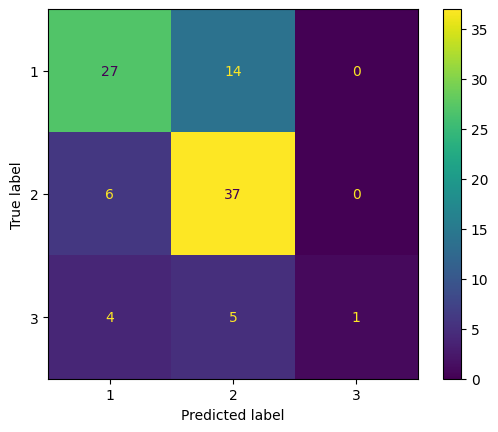

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#format (ytrue, y_pred)
print("accuracy_score        : ", accuracy_score(y_test, y_pred))
print("precision_score       : ", precision_score(y_test, y_pred, average='macro'))
print("recall_score          : ", recall_score(y_test, y_pred, average='macro'))
print("f1_score              : ", f1_score(y_test, y_pred, average='weighted'))

print("classification_report : \n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3])
cmp.plot()

## 8. Analysis

In [51]:
grid.best_estimator_

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=999)

In [52]:
importances = grid.best_estimator_.feature_importances_
importances

array([0.39110281, 0.32065509, 0.2882421 ])

<Axes: ylabel='features'>

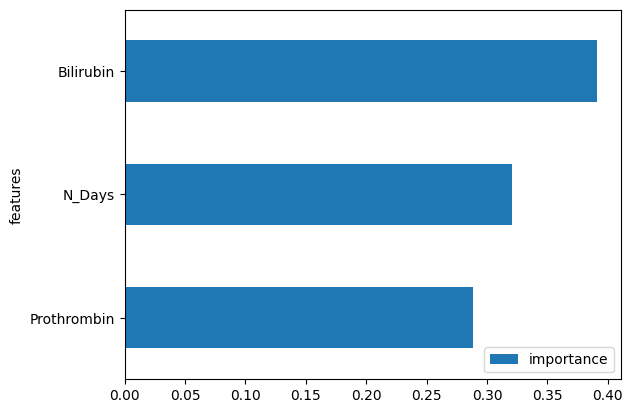

In [53]:
feature_importance = pd.DataFrame(['Bilirubin', 'N_Days', 'Prothrombin'], 
                                  columns=['features'])
feature_importance["importance"] = importances

feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features', y='importance')

## 9. Inference

In [54]:
import pickle

# Save the model to disk
filename = './model/survival_predictoin.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [55]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [56]:
X_test

,Bilirubin,N_Days,Prothrombin
228,4.5,348,11.4
9,12.6,51,11.5
57,0.7,4459,10.6
60,0.6,4256,13.0
25,5.2,1444,9.9
...,...,...,...
304,2.9,1216,10.6
19,5.1,1356,13.0
147,7.2,1427,9.8
92,1.3,3913,11.1


In [57]:
y_test

228    0
9      0
57     1
60     1
25     0
      ..
304    1
19     0
147    0
92     1
79     0
Name: Status, Length: 94, dtype: int64

In [58]:
# Try inference 3 samples
inference_sample1 = np.array([[4.5, 348, 11.4]])
inference_sample2 = np.array([[12.6, 51, 11.5]])
inference_sample3 = np.array([[0.7, 4459, 10.6]])

print('inference_sample1 : ', inference_sample1)
print('inference_sample2 : ', inference_sample2)
print('inference_sample3 : ', inference_sample3)

inference_sample1 :  [[  4.5 348.   11.4]]
inference_sample2 :  [[12.6 51.  11.5]]
inference_sample3 :  [[7.000e-01 4.459e+03 1.060e+01]]


In [59]:
# Try to use inference sample 1 to predict
predicted_status_1 = loaded_model.predict(inference_sample1)
predicted_status_1

print('predicted_selling_price1 : ', predicted_status_1)

predicted_selling_price1 :  [0]


In [60]:
# Try to use inference sample 2 to predict
predicted_status_2 = loaded_model.predict(inference_sample2)
predicted_status_2

print('predicted_selling_price2 : ', predicted_status_2)

predicted_selling_price2 :  [0]


In [61]:
# Try to use inference sample 3 to predict
predicted_status_3 = loaded_model.predict(inference_sample3)
predicted_status_3

print('predicted_selling_price3 : ', predicted_status_3)

predicted_selling_price3 :  [1]


## 10. Deployment

In [62]:
# In Deployment Part I will do as
# Frontend use Bootstrap
# Backend uses Django
# Deploy to VM of ml2023 by Docker